<a href="https://colab.research.google.com/github/KarolMc/msc_dissertation/blob/main/PCA_and_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib

import pandas as pd
import numpy as np

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer

import random

random_seed = random.seed(42)

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv('Data/multiselected_data/X_train_multiselected.csv', index_col=[0])
y_train = pd.read_csv('Data/y_train_SMOV.csv', index_col=[0])
X_test = pd.read_csv('Data/multiselected_data/X_test_multiselected.csv', index_col=[0])
y_test = pd.read_csv('Data/y_test.csv', index_col=[0])

train_features = X_train.columns

In [ ]:
diabetes_data = X_train

In [ ]:
diabetes_data.head()

,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Upper_Arm_Length_cm,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade
0,315.2,4.28,51.0,19.7,1.264,28.0,5.87,57.0,1.073,18.0,...,35.0,0,0,0,0,50.5,0,0,0,0
1,315.2,4.28,89.0,16.3,1.264,28.0,0.00,8.0,1.073,18.0,...,26.9,0,0,1,1,29.4,0,0,0,0
2,315.2,4.28,39.0,30.1,1.660,30.0,1.96,43.0,1.569,25.0,...,35.0,0,1,0,0,71.0,0,0,0,0
3,315.2,4.28,51.0,25.0,1.264,28.0,1.96,0.0,1.073,18.0,...,35.5,1,0,0,0,5.1,1,0,0,0
4,428.3,3.57,47.0,31.1,1.569,23.0,4.89,47.0,1.558,20.0,...,39.8,0,1,0,0,105.3,0,0,0,0


In [ ]:
diabetes_labels = y_train

diabetes_labels = diabetes_labels.rename({'0': 'Diabetes_status'}, axis = 1)
diabetes_labels.head()

,Diabetes_status
0,0
1,0
2,1
3,0
4,0


In [ ]:
diabetes_training_data = pd.concat([diabetes_data, diabetes_labels], axis = 1)

diabetes_training_data.shape

(75864, 69)

In [ ]:
diabetes_training_data.head()

,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,Diabetes_status
0,315.2,4.28,51.0,19.7,1.264,28.0,5.87,57.0,1.073,18.0,...,0,0,0,0,50.5,0,0,0,0,0
1,315.2,4.28,89.0,16.3,1.264,28.0,0.00,8.0,1.073,18.0,...,0,0,1,1,29.4,0,0,0,0,0
2,315.2,4.28,39.0,30.1,1.660,30.0,1.96,43.0,1.569,25.0,...,0,1,0,0,71.0,0,0,0,0,1
3,315.2,4.28,51.0,25.0,1.264,28.0,1.96,0.0,1.073,18.0,...,1,0,0,0,5.1,1,0,0,0,0
4,428.3,3.57,47.0,31.1,1.569,23.0,4.89,47.0,1.558,20.0,...,0,1,0,0,105.3,0,0,0,0,0


In [ ]:
diabetes_training_data['Diabetes_status'].value_counts()

0    25288
1    25288
2    25288
Name: Diabetes_status, dtype: int64

In [ ]:
normal_training_data_df = diabetes_training_data[diabetes_training_data['Diabetes_status'] == 0]
prediabetes_training_data_df = diabetes_training_data[diabetes_training_data['Diabetes_status'] == 1]
diabetes_training_data_df = diabetes_training_data[diabetes_training_data['Diabetes_status'] == 2]

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(2^15, 2^15))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(normal_training_data_df.corr(), dtype=bool))

# generate heatmap
sns_plt = sns.heatmap(normal_training_data_df.corr(), annot=False, mask=mask, vmin=-1, vmax=1, cmap = 'coolwarm')
plt.title('Correlation Coefficient Of Predictors: Normal Diabetes Status')
plt.show()

In [ ]:
# set figure size
plt.figure(figsize=(2^15, 2^15))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(prediabetes_training_data_df.corr(), dtype=bool))

# generate heatmap
sns_plt = sns.heatmap(prediabetes_training_data_df.corr(), annot=False, mask=mask, vmin=-1, vmax=1, cmap = 'coolwarm')
plt.title('Correlation Coefficient Of Predictors: Prediabetes Diabetes Status')
plt.show()

In [ ]:
# set figure size
plt.figure(figsize=(2^15, 2^15))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(diabetes_training_data_df.corr(), dtype=bool))

# generate heatmap
sns_plt = sns.heatmap(diabetes_training_data_df.corr(), annot=False, mask=mask, vmin=-1, vmax=1, cmap = 'coolwarm')
plt.title('Correlation Coefficient Of Predictors: Diabetes Diabetes Status')
plt.show()

In [ ]:
correlation = diabetes_training_data.corr()

mask = correlation.columns[:-1]

exclude = correlation.drop(mask)

exclude.transpose()

exclude.apply(pd.to_numeric)

exclude.style.background_gradient(cmap='coolwarm', axis = 1)

,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,Pulse_60s,Klotho_pg_ml,Creatinine_umol_L,Systolic_BP_mm_hg,Waist_Circumference_cm,Total_Blood_Mercury_umol_l,Mean_Platelet_Volumne_fl,Urinary_Thiocyanate_ng_ml,Red_Cell_Distribution_Width_Percent,Osmolality_mmol_Kg,Asparate_aminotransferase_AST_U_L,Total_Cholesterol_mmol_l,Albumin_g_l,Upper_Leg_Length_cm,Albumin_urine_ug_ml,Sodium_mmol_L,Cotinine_ng_ml,RBC_folate_nmol_l,Blood_lead_umol_l,Albumin_creatinine_ratio_mg_g,Creatinine_unrine_umol_l,Chloride_mmol_L,Household_size,Average_Sagittal_Diameter_cm,Platelet_Count,Diastolic_BP_mm_hg,Arm_circumference_cm,25_hydroxyvitamin_D2+D3,LDL_Cholesterol_mmol_l,Mean_Cell_Haemoglobin_Concentration_g_dl,Haemoglobin_g_dl,Mean_Cell_Haemoglobin_pg,Basophils_number,Total_Bilirubin_umol_L,Family_income_poverty_ratio,White_Blood_Cell_Count,Potassium_mmol_L,Alkaline_phosphotase_U_L,Lymphocyte_number,Eosinophils_number,Lactate_Dehydrogenase_U_l,Mean_Cell_Volume_fl,RBC_Folate_nmol_l,Alanine_aminotransferase_ALT_U_L,BMI_Underweight,BMI_Obese,Household_income_greater100k,Height_Standing_cm,Upper_Arm_Length_cm,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,Diabetes_status
Diabetes_status,0.173628,0.281853,-0.164540,0.464639,0.235827,0.233372,0.151733,0.656162,0.203053,0.189341,-0.250310,0.179362,0.155859,0.401258,0.541968,0.116650,0.164288,0.001709,0.184368,0.337367,0.092116,0.137065,-0.241762,-0.115024,0.102015,-0.100143,0.083831,0.122503,0.117390,0.065916,0.023047,-0.223735,-0.279690,0.358545,-0.157173,0.111161,0.495677,-0.032273,0.038696,-0.119773,0.088429,0.071995,0.112215,0.032347,0.011281,0.082443,0.134066,0.007389,-0.102344,0.025531,0.109766,0.138093,0.123328,0.139295,-0.371528,0.175635,-0.208778,0.327655,0.432378,-0.177216,-0.190968,-0.285895,-0.176995,0.504629,-0.225853,-0.155542,-0.133136,-0.184319,1.000000


In [ ]:
features = list(diabetes_training_data.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
x = diabetes_training_data.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [ ]:
x.shape

(75864, 69)

In [ ]:
np.mean(x),np.std(x)


(-1.2857219695044811e-17, 0.9999999999999993)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [ ]:
normalised_diabetes = pd.DataFrame(x,columns=feat_cols)

In [ ]:
normalised_diabetes.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68
75859,1.195988,4.202949,0.165923,1.065645,0.681896,-0.362229,-0.217269,1.058942,1.326963,0.878521,...,-0.351868,-0.376665,-0.236143,-0.152897,0.553804,-0.204734,-0.215842,-0.108705,-0.189543,1.224745
75860,0.394530,0.594827,-1.056077,0.800345,1.830612,0.898282,-0.525456,0.782558,-0.238103,0.131039,...,-0.351868,-0.376665,-0.236143,-0.152897,0.825601,-0.204734,-0.215842,-0.108705,-0.189543,1.224745
75861,1.314202,3.611388,1.318860,-0.479428,-0.389809,1.870243,-0.143431,1.371850,-0.285674,0.001102,...,2.841973,-0.376665,-0.236143,-0.152897,-0.329648,-0.204734,-0.215842,-0.108705,-0.189543,1.224745
75862,0.659000,-0.680559,-0.108212,3.019826,1.623970,0.404626,-0.820473,-0.100312,2.924258,-0.184265,...,-0.351868,-0.376665,-0.236143,-0.152897,1.856415,-0.204734,-0.215842,-0.108705,-0.189543,1.224745
75863,1.040042,4.573514,-1.229445,1.706396,0.814002,0.058322,0.490821,1.326936,0.019026,-0.269287,...,-0.351868,-0.376665,-0.236143,-0.152897,0.880980,-0.204734,-0.215842,-0.108705,-0.189543,1.224745


In [ ]:
from sklearn.decomposition import PCA
pca_diabetes = PCA(n_components=10)
principalComponents_diabetes = pca_diabetes.fit_transform(x)

In [ ]:
principal_diabetes_Df = pd.DataFrame(data = principalComponents_diabetes
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4',
                         'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8',
                         'principal component 9', 'principal component 10'])

In [ ]:
principal_diabetes_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-1.813481,0.126141,-0.698304,-0.488011,-0.813097,0.114294,2.312962,-1.058311,-0.827376,1.425789
1,-7.513972,0.028317,1.930288,0.345617,-0.408653,1.553650,0.869252,3.714696,-2.076298,1.895542
2,-0.089546,2.397769,-1.456908,0.842100,1.261006,-1.615476,-0.633641,1.226915,-1.256235,-0.512871
3,-3.951955,0.525755,-0.652665,1.379977,0.950637,-0.610480,-1.474398,-4.188705,0.558105,-2.235895
4,1.502520,-2.203405,-3.211425,-0.531577,2.065230,-2.315217,0.621808,-1.402587,-1.321077,3.199439


In [ ]:
print('Explained variation per principal component: {}'.format(pca_diabetes.explained_variance_ratio_))

Explained variation per principal component: [0.12796295 0.05503632 0.04643163 0.04159957 0.03384852 0.03239467
 0.02947621 0.02789997 0.02686594 0.02478151]


In [ ]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [ ]:
from sklearn.decomposition import PCA
diabetes_pca = PCA(n_components = 10)
components = diabetes_pca.fit(x).components_
components = pd.DataFrame(components).transpose()
components.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10']
#components.index =  x_train.columns
print(components)

       Comp1     Comp2     Comp3     Comp4     Comp5     Comp6     Comp7  \
0   0.114469  0.005302  0.089109  0.042887  0.259337  0.035118 -0.044217   
1   0.102726  0.007132  0.374463 -0.058768  0.146516 -0.013564 -0.027295   
2  -0.075666 -0.094240  0.089097 -0.107886 -0.264103  0.059422  0.143791   
3   0.259272  0.179468 -0.103993 -0.003878  0.017337  0.003599 -0.167333   
4   0.098024  0.012713  0.009378  0.302855  0.065500 -0.002446 -0.183556   
..       ...       ...       ...       ...       ...       ...       ...   
64 -0.101610  0.038962  0.004066  0.090445  0.053403 -0.066968 -0.124722   
65 -0.038111 -0.031335 -0.038068 -0.032978  0.012133  0.025250 -0.079329   
66 -0.076109  0.019966  0.034992  0.038644  0.031407 -0.007991 -0.017894   
67 -0.061316 -0.013522 -0.118392 -0.124688  0.135281  0.112265  0.075336   
68  0.226572  0.067851  0.146020  0.063600 -0.084869  0.020870  0.035490   

       Comp8     Comp9    Comp10  
0  -0.063606  0.103819 -0.065425  
1  -0.009787  0.1

In [ ]:
var_ratio = diabetes_pca.explained_variance_ratio_
var_ratio= pd.DataFrame(var_ratio).transpose()
var_ratio.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10']

var_ratio.index = ['Proportion of Variance']
print(var_ratio)

                           Comp1     Comp2     Comp3   Comp4    Comp5  \
Proportion of Variance  0.127963  0.055038  0.046433  0.0416  0.03387   

                           Comp6     Comp7     Comp8     Comp9    Comp10  
Proportion of Variance  0.032406  0.029533  0.027884  0.026841  0.024914  


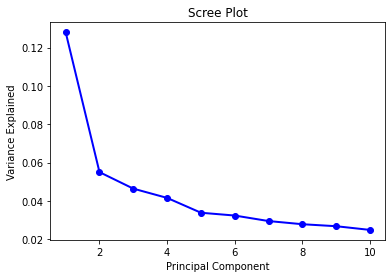

In [ ]:
PC_values = np.arange(diabetes_pca.n_components_) + 1
plt.plot(PC_values, diabetes_pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
diabetes_pcomp = diabetes_pca.fit_transform(x)
diabetes_pcomp = pd.DataFrame(diabetes_pcomp)
diabetes_pcomp = diabetes_pcomp.iloc[:,0:6]
diabetes_pcomp.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6']
print(diabetes_pcomp.head())

      Comp1     Comp2     Comp3     Comp4     Comp5     Comp6
0 -1.813794  0.150584 -0.686635 -0.452403 -0.670476  0.186157
1 -7.514076  0.043808  1.966105  0.287016 -0.518227  1.409529
2 -0.089355  2.399506 -1.479453  0.849317  1.325245 -1.580218
3 -3.951696  0.517784 -0.660114  1.364322  0.923388 -0.611835
4  1.501676 -2.215775 -3.189372 -0.530199  2.335642 -2.493486


In [ ]:
import seaborn as sns

In [ ]:
diabetes_pcomp.shape

(75864, 6)

In [ ]:
diabetes_pcomp['y'] = y_train

In [ ]:
imaging_comp = diabetes_pcomp[['Comp1', 'Comp2', 'y']]

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Comp1", y="Comp2",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=imaging_comp,
    legend="full",
    alpha=0.3
)

In [ ]:
normal_df = diabetes_pcomp[diabetes_pcomp['y'] == 0]
prediabetes_df = diabetes_pcomp[diabetes_pcomp['y'] == 1]
diabetes_df = diabetes_pcomp[diabetes_pcomp['y'] == 2]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

colors=['r', 'g', 'b'] 
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection = '3d')

p1 = ax.plot(normal_df['Comp1'],
                normal_df['Comp2'],  
             normal_df['Comp3'], 
             'o', color=colors[0],                                                
             alpha = 0.6, label='Normal',                           
             markersize=3, 
             markeredgecolor='black',
             markeredgewidth=0.1)

p2 = ax.plot( prediabetes_df['Comp1'],prediabetes_df['Comp2'],
             prediabetes_df['Comp3'], 
             'o', color=colors[1],                                                 
             alpha = 0.6, label='Prediabetes',                           
             markersize=3, 
             markeredgecolor='black',
             markeredgewidth=0.1)


p2 = ax.plot( diabetes_df['Comp1'],diabetes_df['Comp2'], 
             diabetes_df['Comp3'], 
             'o', color=colors[2],                                          
             alpha = 0.6, label='Diabetes',                          
             markersize=3, 
             markeredgecolor='black',
             markeredgewidth=0.1)



ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

fig.legend(fontsize = 'x-small', loc='upper center', markerscale=2)
plt.autoscale()
plt.rcParams["figure.dpi"] = 1000                        
plt.show()


In [ ]:
# Incremental PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
transformer = IncrementalPCA(n_components = 10, batch_size = 200)

In [ ]:
incrementalPCA_Diabetes = transformer.fit(X_train)

In [ ]:
components = incrementalPCA_Diabetes.components_
components = pd.DataFrame(components).transpose()
components.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10']
#components.index =  x_train.columns
print(components)

           Comp1         Comp2     Comp3     Comp4     Comp5         Comp6  \
0   1.517580e-03 -1.043560e-03  0.009717  0.011473  0.025005  1.312407e-02   
1  -1.349472e-05 -6.599905e-05  0.000635  0.000723  0.001254  4.428176e-04   
2  -2.316126e-04 -2.280409e-04 -0.000590 -0.001040 -0.001647 -1.089323e-03   
3   1.957860e-04  2.500001e-06  0.000505  0.001464  0.002336  6.690857e-04   
4  -4.523601e-07  8.353717e-06  0.000124  0.000311  0.000396  1.232854e-04   
..           ...           ...       ...       ...       ...           ...   
63  1.191110e-03  5.209991e-04  0.002573  0.005141  0.009449  2.116274e-03   
64 -2.821301e-06 -2.000522e-06 -0.000008 -0.000011 -0.000027 -1.303176e-06   
65 -2.310392e-07 -1.363134e-06 -0.000006 -0.000002 -0.000008 -7.033594e-06   
66 -8.566145e-07 -4.943651e-07 -0.000002 -0.000002 -0.000006 -9.700731e-07   
67  1.701126e-06 -2.578375e-06 -0.000003 -0.000015 -0.000028 -1.554199e-06   

       Comp7     Comp8     Comp9    Comp10  
0  -0.023168  0.11

In [ ]:
var_ratio = incrementalPCA_Diabetes.explained_variance_ratio_
var_ratio= pd.DataFrame(var_ratio).transpose()
var_ratio.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10']

var_ratio.index = ['Proportion of Variance']
print(var_ratio)

                           Comp1    Comp2     Comp3     Comp4     Comp5  \
Proportion of Variance  0.893001  0.09299  0.005891  0.002905  0.002419   

                           Comp6    Comp7     Comp8     Comp9    Comp10  
Proportion of Variance  0.001497  0.00077  0.000184  0.000108  0.000077  


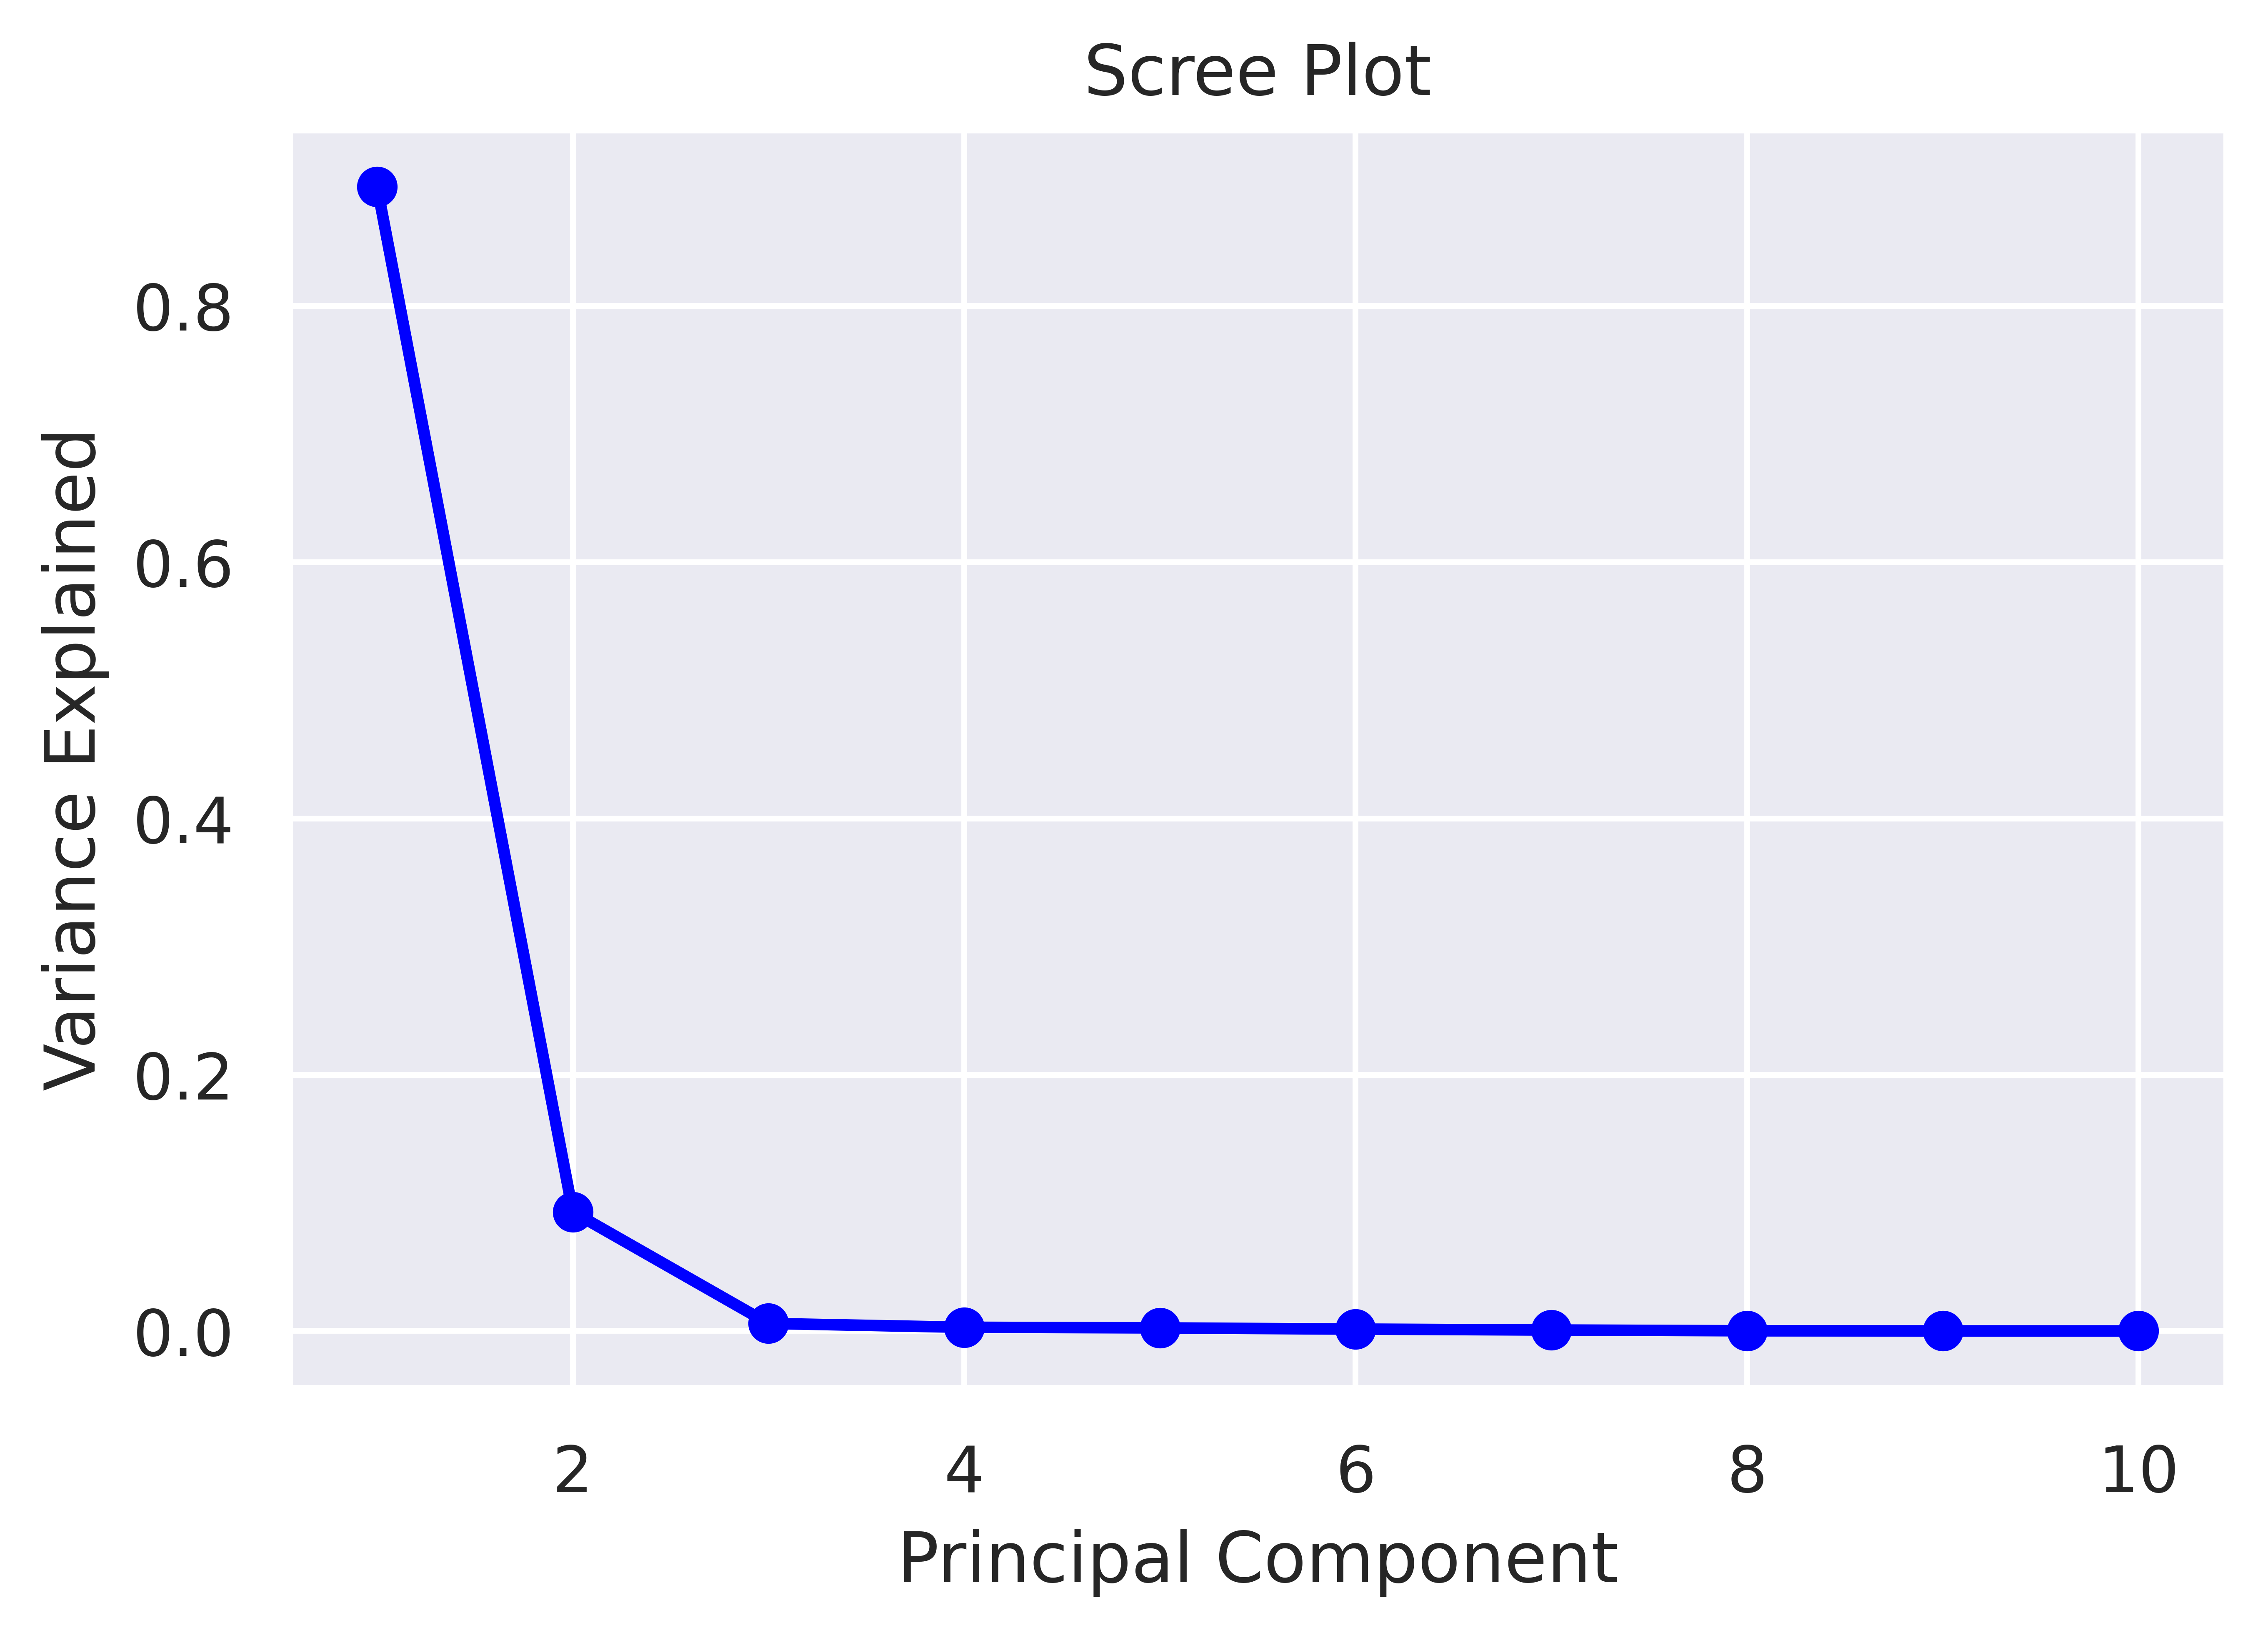

In [ ]:
PC_values = np.arange(incrementalPCA_Diabetes.n_components_) + 1
plt.plot(PC_values, incrementalPCA_Diabetes.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
diabetes_pinccomp = incrementalPCA_Diabetes.fit_transform(x)
diabetes_pinccomp = pd.DataFrame(diabetes_pinccomp)
diabetes_pinccomp = diabetes_pinccomp.iloc[:,0:3]
diabetes_pinccomp.columns = ['Comp1', 'Comp2', 'Comp3']
print(diabetes_pinccomp.head())

      Comp1     Comp2     Comp3
0 -1.806445 -0.181437 -0.648393
1 -7.516560  0.026572  2.107689
2 -0.072035 -2.510239 -1.504245
3 -3.951149 -0.508688 -0.706208
4  1.569060  2.040852 -2.844279


In [ ]:
diabetes_pinccomp['y'] = y_train

In [ ]:
imaging_comp = diabetes_pinccomp[['Comp1', 'Comp2', 'y']]

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Comp1", y="Comp2",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=imaging_comp,
    legend="full",
    alpha=0.3
)

In [ ]:
normal_i_df = diabetes_pinccomp[diabetes_pinccomp['y'] == 0]
prediabetes_i_df = diabetes_pinccomp[diabetes_pinccomp['y'] == 1]
diabetes_i_df = diabetes_pinccomp[diabetes_pinccomp['y'] == 2]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

colors=['r', 'g', 'b'] 
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection = '3d')

p1 = ax.plot(normal_i_df['Comp1'],
                normal_i_df['Comp2'],  
             normal_i_df['Comp3'], 
             'o', color=colors[0],                                       
             alpha = 0.6, label='Normal',                        
             markersize=3, 
             markeredgecolor='black',
             markeredgewidth=0.1)

p2 = ax.plot( prediabetes_i_df['Comp1'],prediabetes_i_df['Comp2'],
             prediabetes_i_df['Comp3'], 
             'o', color=colors[1],                                          
             alpha = 0.6, label='Prediabetes',                   
             markersize=3, 
             markeredgecolor='black',
             markeredgewidth=0.1)


p2 = ax.plot( diabetes_i_df['Comp1'],diabetes_i_df['Comp2'], 
             diabetes_i_df['Comp3'], 
             'o', color=colors[2],                                             
             alpha = 0.6, label='Diabetes',                     
             markersize=3, 
             markeredgecolor='black',
             markeredgewidth=0.1)



ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

fig.legend(fontsize = 'x-small', loc='upper center', markerscale=2)
plt.autoscale()
plt.rcParams["figure.dpi"] = 1000                               
plt.show()


In [ ]:
# correlations

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(2^15, 2^15))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(diabetes_training_data.corr(), dtype=bool))

# generate heatmap
sns_plt = sns.heatmap(diabetes_training_data.corr(), annot=False, mask=mask, vmin=-1, vmax=1, cmap = 'coolwarm')
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:
plt.savefig('saving-a-high-resolution-seaborn-plot.png', dpi=300)

<Figure size 6000x4000 with 0 Axes>